In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import gsw as sw
import scipy.stats as ss
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

/Users/archie/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# import cruise data

in_file = '../data/KuroAlldata.csv'
data = pd.read_csv(in_file, sep = ',')
data['theta'] = sw.conversions.pt_from_t(data['S'], data['T(C)'], data['depth (m)'])

in_file = '../data/data_CHL.csv'
chl = pd.read_csv(in_file, sep = ',')

print chl.columns

Index([u'Unnamed: 0', u'station', u'lat', u'lon', u'bottle', u'depth (m)',
       u'fluorescence', u'dx', u'x', u'CHL', u'T(C)', u'theta', u'S',
       u'sigma_t', u'sample'],
      dtype='object')


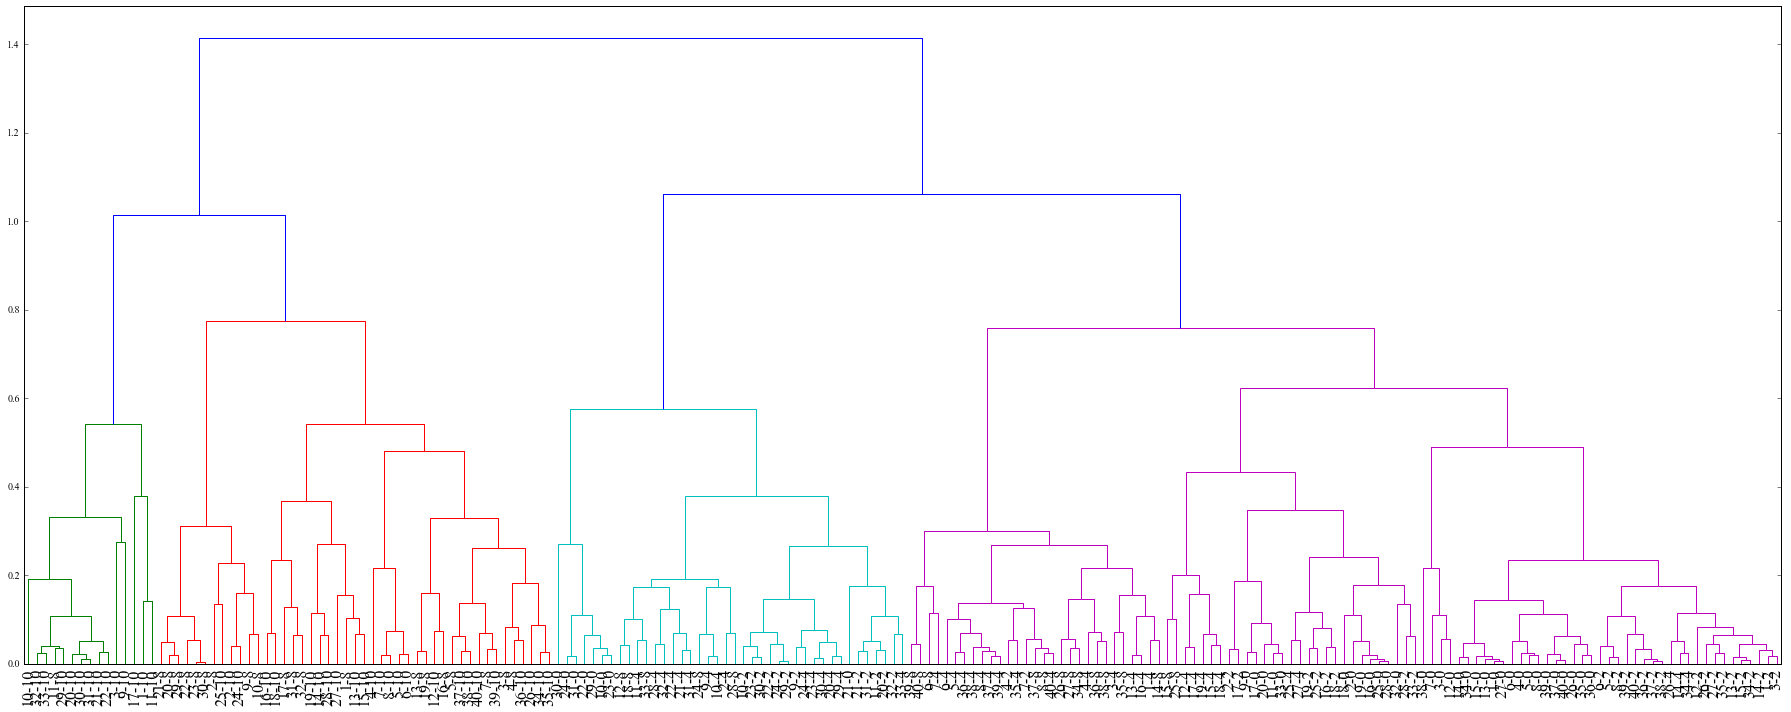

In [16]:
sub = chl[['sample', 'theta', 'S', 'depth (m)']].dropna()
sub = sub.set_index('sample')
del sub.index.name

# normalise data
sub_norm = (sub - sub.mean()) / (sub.max() - sub.min()) 
dist = pdist(sub_norm, 'euclidean')

Z = linkage(dist, 'complete')

fig1 = plt.figure(figsize=(25, 10))
dendrogram(Z,leaf_rotation=90.,leaf_font_size=16.,labels=sub_norm.index)
plt.show()
# fig1.savefig('../figures/TS_dendrogram_complete.png', dpi = 300)

In [21]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.6
clusters = fcluster(Z, max_d, criterion='distance')
clusters

sub['cluster'] = clusters

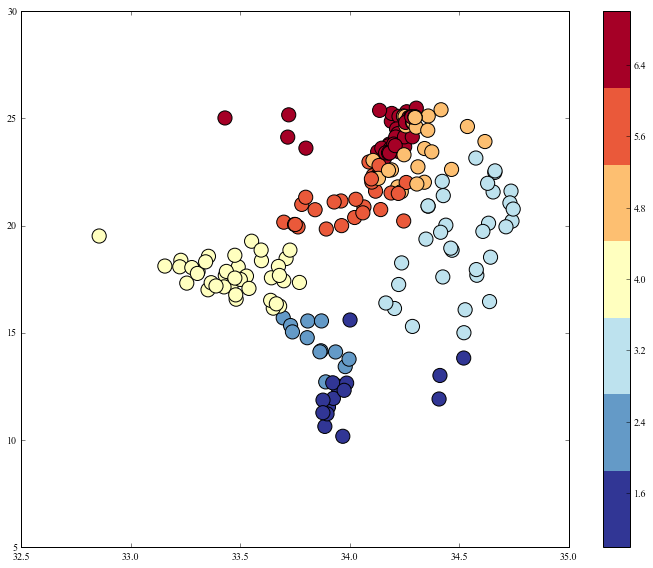

In [22]:
fig2 = plt.figure(figsize = (10,8))

palette = plt.get_cmap('RdYlBu_r', np.max(clusters))
plt.scatter(sub['S'].values, sub['theta'].values, s = 200,c=sub['cluster'].values, cmap = palette)
plt.colorbar()